In [138]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples

%matplotlib inline 
plt.rcParams['figure.figsize'] = [10.0, 6.0] # Plot size 조정
matplotlib.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지


In [139]:
# log로 normalize된 데이터
objects = pd.read_csv('./data/clustering_parameters_before_norm.csv', encoding='utf-8'); # 비율, 총인원 혼합사용. 20남,30남,40남,50남,6-70남,20여,30여,40여,50여,6-70여,총인원
total = np.array(objects['총인원']);
# total = np.log10(total+1);
header = ['20남', '30남', '40남', '50남', '6-70남', '20여', '30여', '40여', '50여', '6-70여']

for i in range(len(total)):
    for h in header:
        objects[h][i] = objects[h][i]*total[i];
# objects['총인원'] = total
objects=objects.drop('총인원', axis=1)
objects

,20남,30남,40남,50남,6-70남,20여,30여,40여,50여,6-70여
0,8115.686815,10554.018460,11412.989438,10401.025724,9327.534119,9183.633494,8908.472052,9240.380141,8784.669110,10291.090648
1,12448.921340,18415.790564,19390.622316,16962.820328,15313.030138,15874.355759,16334.074905,15624.082920,14291.422893,14790.878838
2,10428.704853,12763.518598,12983.126334,11469.468990,10039.749714,12472.165877,10905.078647,10490.138571,9695.771410,10408.777007
3,5433.442450,5220.376021,5185.364287,4940.982084,4956.954188,5673.390425,4452.746963,4757.310944,4686.121710,5885.810928
4,4041.845655,5448.640398,5891.516589,5309.761925,4664.157931,4630.050924,4587.111415,4694.754267,4409.149804,5079.011091
...,...,...,...,...,...,...,...,...,...,...
1475,1669.231571,1969.556740,1976.448007,2103.321270,2218.246485,1677.162993,1895.225682,2030.276278,2276.185724,2688.845250
1476,22706.225083,19811.777841,19892.142059,19675.766497,23357.464100,21745.618381,19091.202091,19749.489383,21107.061582,28801.752982
1477,24189.821406,20467.480841,21317.084562,21785.958568,26931.774486,22798.312043,19977.973936,21665.300904,23438.039888,33027.253365
1478,22620.724251,19835.000725,20601.746403,20830.338472,25196.545168,21234.185875,19059.504051,20418.767817,22096.856145,30448.331094


In [140]:
# 이상치 제거
inout_pop = pd.read_csv('data/seoul_boarding_pop_by_subway.csv', encoding='utf-8')
inout_pop = inout_pop.drop('datetime', axis=1)

drop_index = list()

for stn in range(len(inout_pop)):
    total_pop_test = sum(inout_pop.iloc[stn, 2:50])
    if total_pop_test < 10000:
        drop_index += [stn]
print(drop_index)
inout_pop = inout_pop.drop(drop_index, axis=0)
inout_pop['station']

[90, 191, 196, 317, 323, 351]


0      동대문
1      동묘앞
2      서울역
3       시청
4      신설동
      ... 
371     망우
372     상봉
373     양원
374     중랑
375     회기
Name: station, Length: 370, dtype: object

In [128]:
# # objects 에서 동일한 이상치 제거
# df = objects.copy();
# drop_objects_index = [];

# for i in drop_index:
#     drop_objects_index.append(i*4);
#     drop_objects_index.append(i*4+1);
#     drop_objects_index.append(i*4+2);
#     drop_objects_index.append(i*4+3);

# df = df.drop(drop_objects_index, axis=0)
# df = df.drop('ID', axis=1)
# df = df.reset_index(drop=True)
# print(df)

               20남           30남           40남           50남         6-70남  \
0      8115.686815  10554.018460  11412.989438  10401.025724   9327.534119   
1     12448.921340  18415.790564  19390.622316  16962.820328  15313.030138   
2     10428.704853  12763.518598  12983.126334  11469.468990  10039.749714   
3      5433.442450   5220.376021   5185.364287   4940.982084   4956.954188   
4      4041.845655   5448.640398   5891.516589   5309.761925   4664.157931   
...            ...           ...           ...           ...           ...   
1475   1669.231571   1969.556740   1976.448007   2103.321270   2218.246485   
1476  22706.225083  19811.777841  19892.142059  19675.766497  23357.464100   
1477  24189.821406  20467.480841  21317.084562  21785.958568  26931.774486   
1478  22620.724251  19835.000725  20601.746403  20830.338472  25196.545168   
1479  10913.209763   9886.436537   9931.306463   9644.630035  11468.541662   

               20여           30여           40여           50여   

In [189]:
# # 데이터 2차원으로 단순화 ['male', 'total']

# df_male = df['20남']+df['30남']+df['40남']+df['50남']+df['6-70남'];

# # df_total = df['총인원'];
# df_total = np.sum(df, axis=1);

# df_data = pd.DataFrame({'male' : df_male, 'total' : df_total});
# print(df_data.shape)

(1480, 2)


In [141]:
# 역 이름 + 시간대 리스트 생성

object_list = [];
for s in inout_pop['station']:
    object_list.append(s+' 아침');
    object_list.append(s+' 낮');
    object_list.append(s+' 저녁');
    object_list.append(s+' 밤');
print(len(object_list))

1480


In [ ]:
"""
여기부터 10차원 데이터 그대로 사용한 PCA
"""

PCA(n_components=10)
분산 : 
[9.65496552e-01 2.26669964e-02 7.11588559e-03 2.66651255e-03
 1.07025489e-03 5.99407139e-04 2.07466876e-04 1.02144495e-04
 5.37016652e-05 2.10779909e-05]


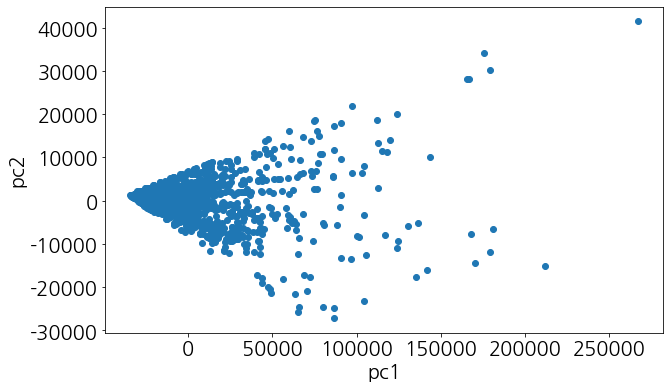

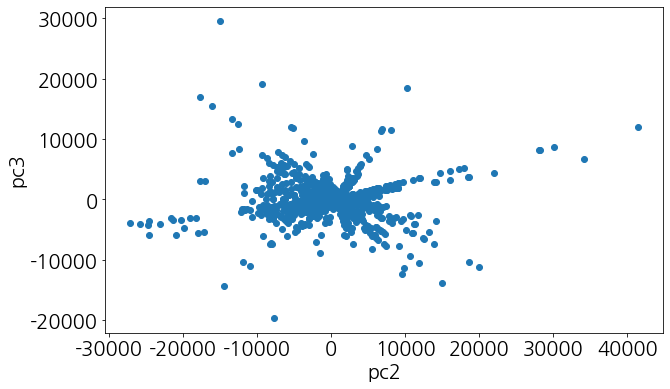

각 PC의 계수 :
[[ 2.83528105e-01  3.58058407e-01  3.39496672e-01  2.84472920e-01
   2.81854694e-01  3.15577392e-01  3.41202677e-01  3.14845119e-01
   2.93275629e-01  3.38577449e-01]
 [-9.71677518e-02  3.85201541e-01  3.41436469e-01  3.00547082e-02
  -3.57135219e-01  2.14181777e-01  2.86988672e-01 -1.46506264e-02
  -2.90430619e-01 -6.19959330e-01]
 [ 5.42776678e-01 -1.60800324e-04 -3.82039348e-01 -4.36873638e-01
  -1.17580007e-01  5.37847751e-01  9.86472574e-02 -1.27999029e-01
  -1.84839702e-01  7.20749913e-02]
 [ 3.64335517e-01  2.29433014e-01  1.23864517e-01  4.01960828e-01
   1.98028846e-01  1.92516327e-02 -4.61584751e-01 -6.08252945e-01
  -7.06597320e-02 -1.00470008e-01]
 [ 2.99123296e-01 -4.78620029e-01  1.06275297e-01  2.74462609e-01
  -1.88284472e-01  2.36115562e-01 -3.75178360e-01  4.70540488e-01
   1.58108997e-01 -3.41257601e-01]
 [ 3.37684013e-01  2.80527543e-01 -3.57316038e-01 -1.42372431e-02
  -1.94526118e-01 -4.36613118e-01  1.60442311e-01  1.15047128e-02
   5.73727500e-01 -3.0

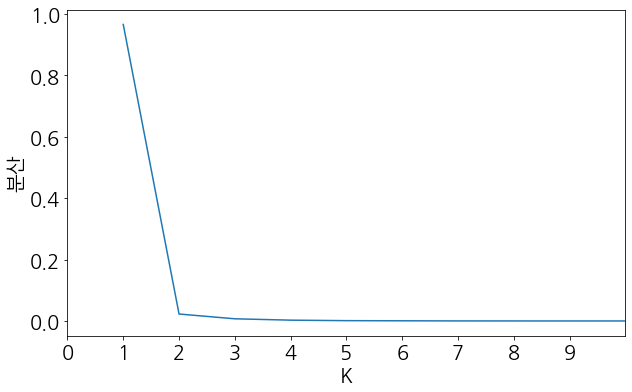

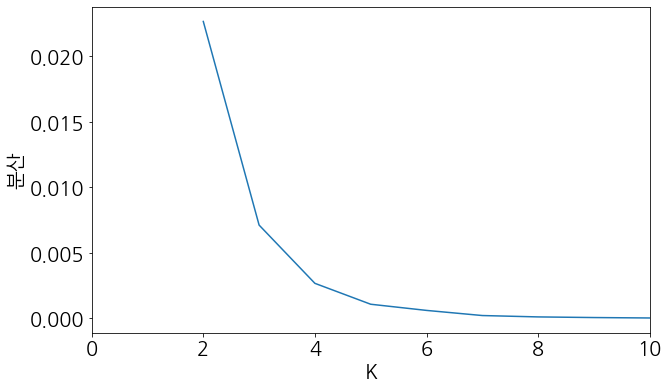

In [143]:
# PCA, n=10
n = 10;
df = objects;
pca = PCA(n_components=n);
pc = pca.fit_transform(df);
df_pc = pd.DataFrame(data=pc, columns = ['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6', 'pc7', 'pc8' ,' pc9' ,'pc10']);
print(pca);
print("분산 : ");
print(pca.explained_variance_ratio_);
plt.rc('font', size='20');
plt.scatter(df_pc['pc1'], df_pc['pc2']);
plt.xlabel('pc1');
plt.ylabel('pc2');
plt.show();

plt.scatter(df_pc['pc2'], df_pc['pc3']);
plt.xlabel('pc2');
plt.ylabel('pc3');
plt.show();
print("각 PC의 계수 :")
print(pca.components_)
df
plt.plot([i+1 for i in range(10)], pca.explained_variance_ratio_);
plt.xlim([0,10]);
plt.xlabel('K');
plt.ylabel('분산');
plt.xticks(range(10));
plt.show();
plt.plot([i+2 for i in range(9)], pca.explained_variance_ratio_[1:]);
plt.xlim([0,10]);
plt.xlabel('K');
plt.ylabel('분산');
plt.show();

k = 2   |   silhouette score: 0.501393  |  SSE: 55499367088.555557


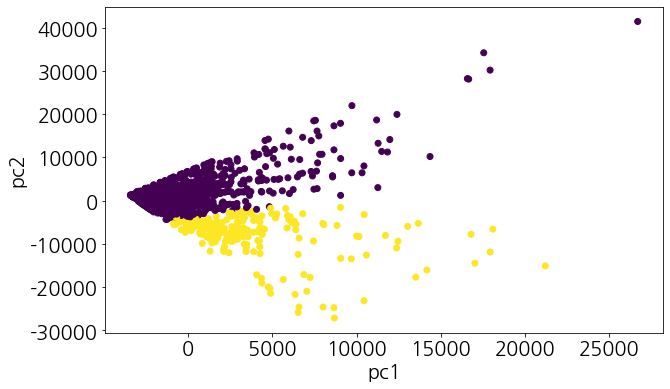

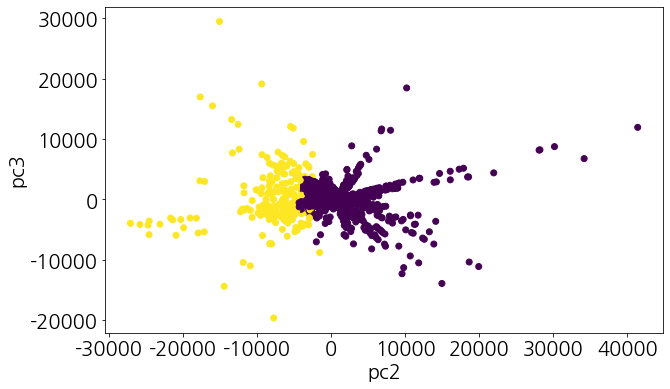

k = 3   |   silhouette score: 0.524645  |  SSE: 41608920437.189102


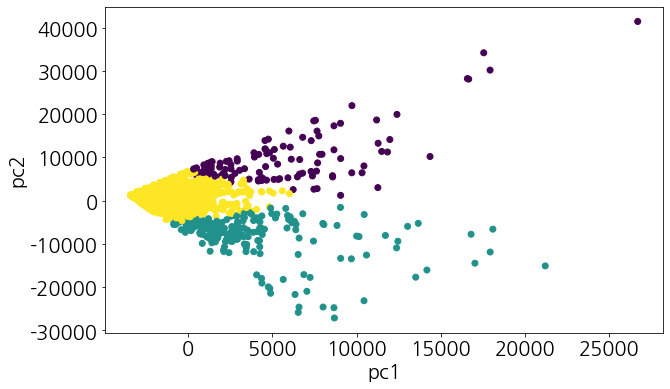

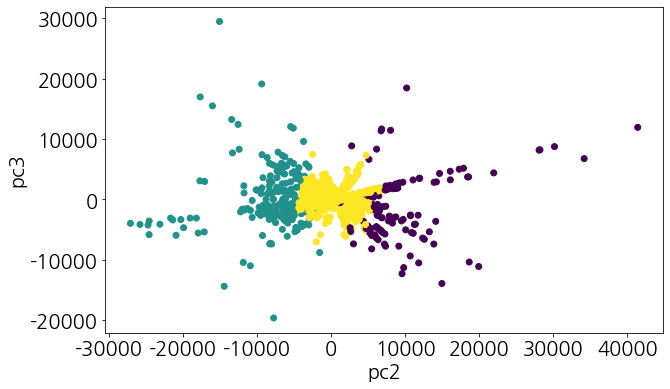

k = 4   |   silhouette score: 0.480722  |  SSE: 36182221029.503021


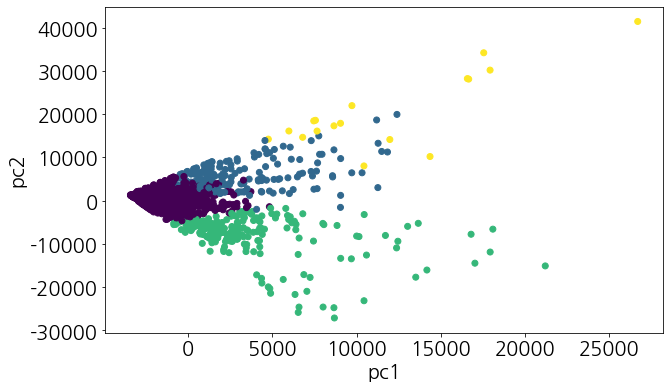

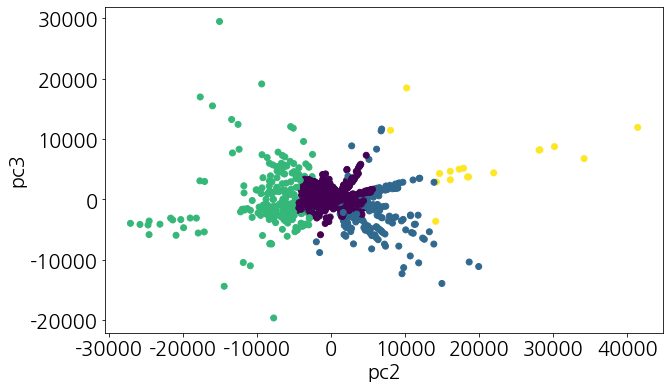

k = 5   |   silhouette score: 0.456753  |  SSE: 31328922346.402840


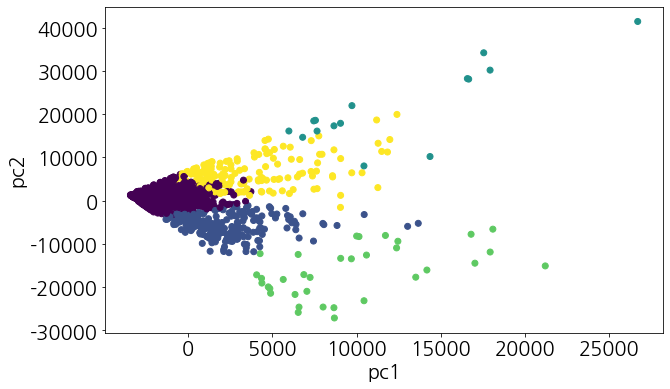

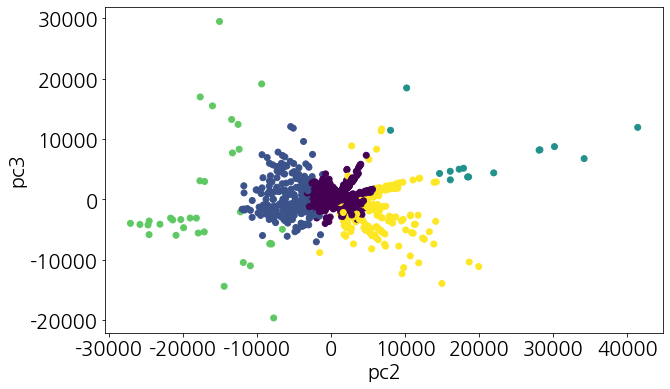

k = 6   |   silhouette score: 0.436675  |  SSE: 27717571866.906506


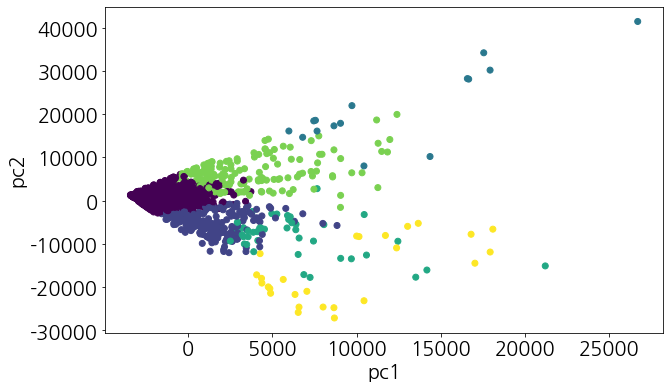

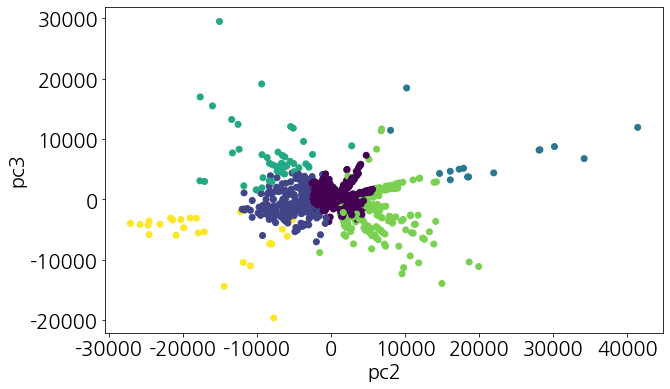

k = 7   |   silhouette score: 0.430972  |  SSE: 25075414410.698856


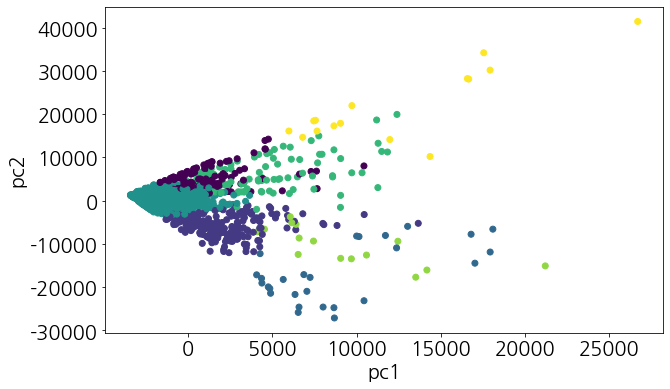

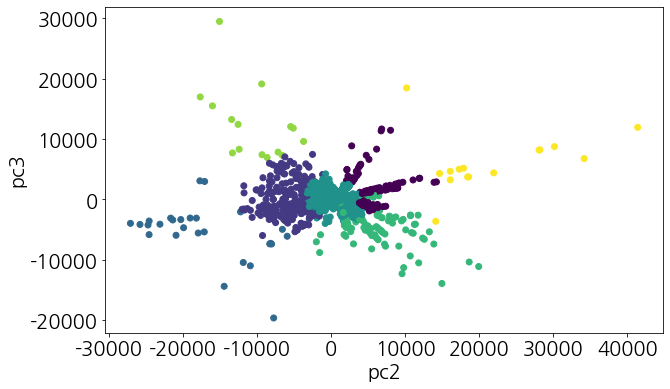

k = 8   |   silhouette score: 0.302832  |  SSE: 23124727311.473610


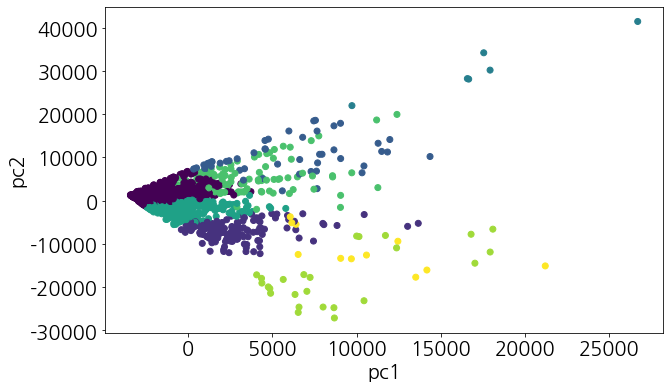

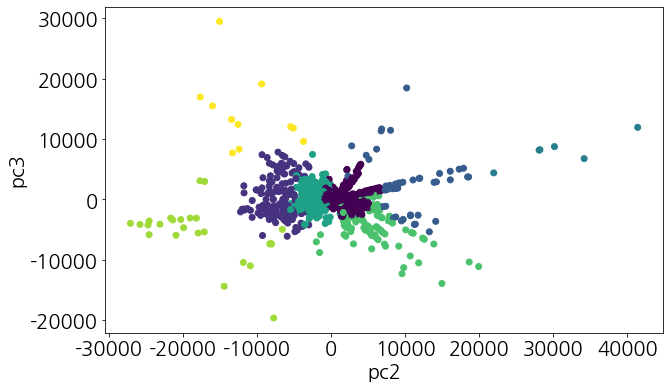

k = 9   |   silhouette score: 0.281282  |  SSE: 21119012297.892860


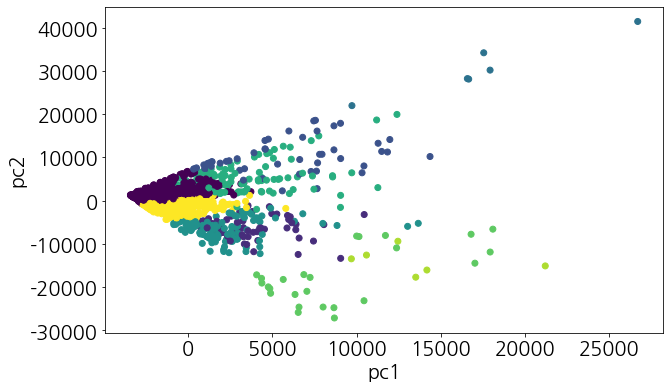

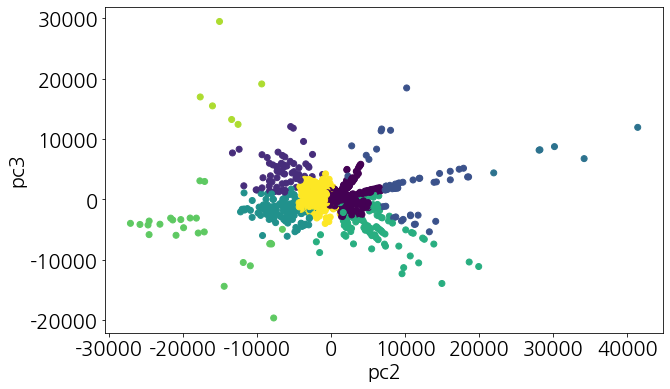

k = 10   |   silhouette score: 0.326374  |  SSE: 19173601456.736221


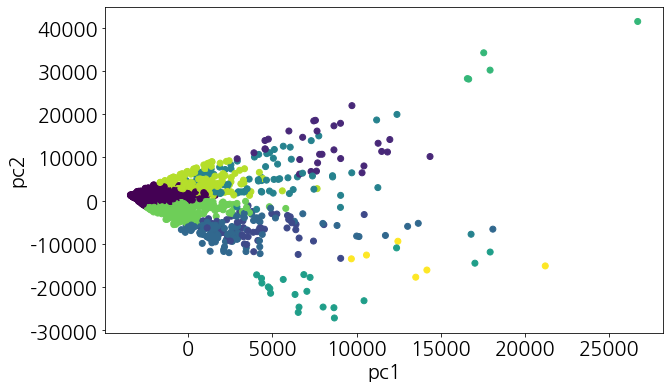

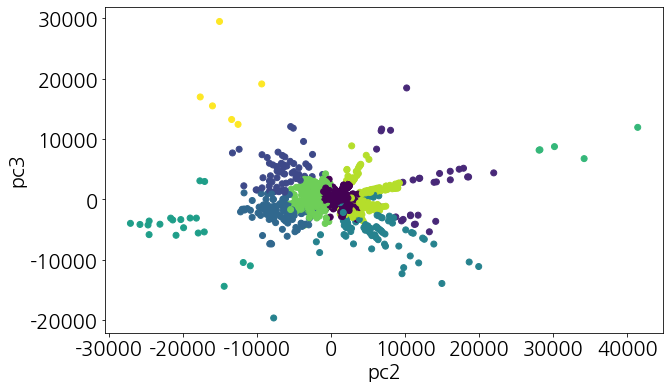

k = 11   |   silhouette score: 0.323820  |  SSE: 17516516110.250217


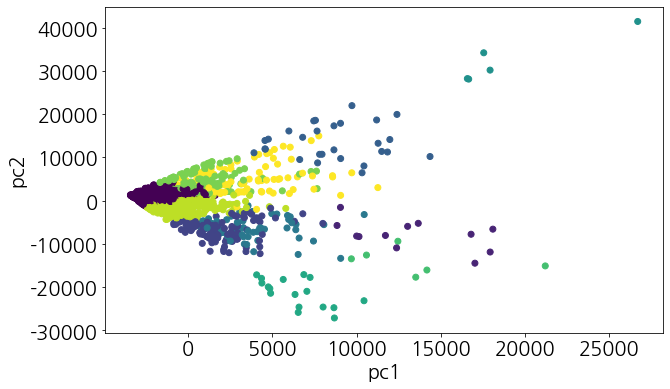

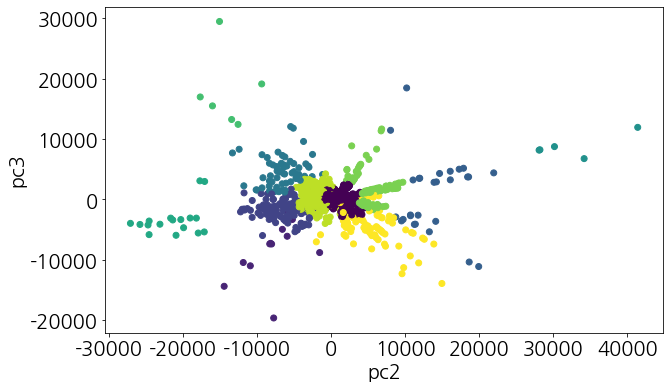

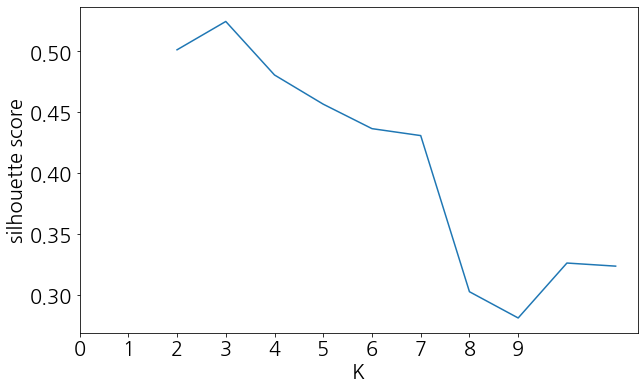

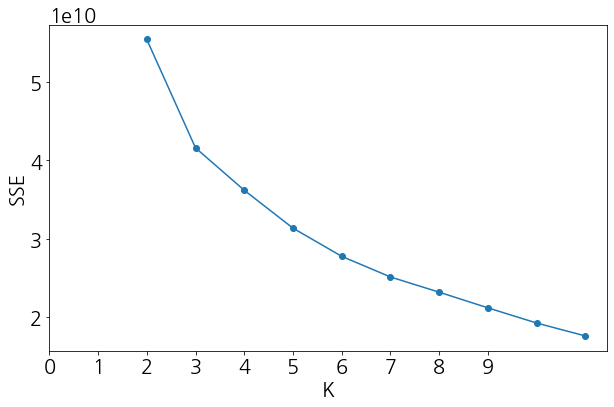

In [144]:
# KMeans to PCA
k_group = [i+2 for i in range(10)] # Choose k range
df_pc_kmeans = df_pc.copy();
df_pc_kmeans['pc1'] = df_pc_kmeans['pc1']/10;
silhouette_group = [];
sse_group = [];
result = [];
for k in k_group:
    km = KMeans(n_clusters = k, random_state = 0); # Initial value => random_state attr.
    km.fit(df_pc_kmeans); # Commit clustering
    result = km.predict(df_pc_kmeans);
    sse_group.append(km.inertia_);
    
    sil_score = silhouette_score(df_pc_kmeans, result.T, metric='euclidean'); # Compute the mean Silhouette Coefficient of all samples.
    silhouette_group.append(sil_score);

    print('k = %d   |   silhouette score: %f  |  SSE: %f' %(k, sil_score, km.inertia_));
    # pc1 vs pc2 그래프
    plt.scatter(df_pc_kmeans['pc1'], df_pc_kmeans['pc2'], c = result); # 점 plot 실행
    plt.xlabel('pc1');
    plt.ylabel('pc2');
    plt.show();
    
    # pc2 vs pc3 그래프
    plt.scatter(df_pc_kmeans['pc2'], df_pc_kmeans['pc3'], c = result); # 점 plot 실행
    plt.xlabel('pc2');
    plt.ylabel('pc3');
    plt.show();

# Silhouette 그래프
plt.plot(k_group, silhouette_group);
plt.xlabel('K');
plt.ylabel('silhouette score');
plt.xticks(range(10));
plt.show();

# SSE 엘보우
plt.plot(k_group, sse_group, marker="o");
plt.xlabel('K');
plt.ylabel('SSE');
plt.xticks(range(10));
plt.show();

7 th silhouette score: 0.430972


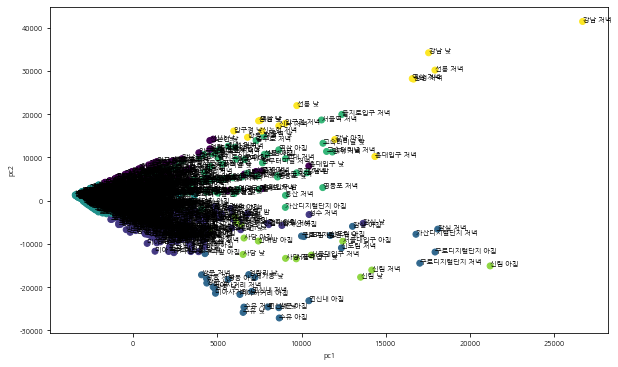

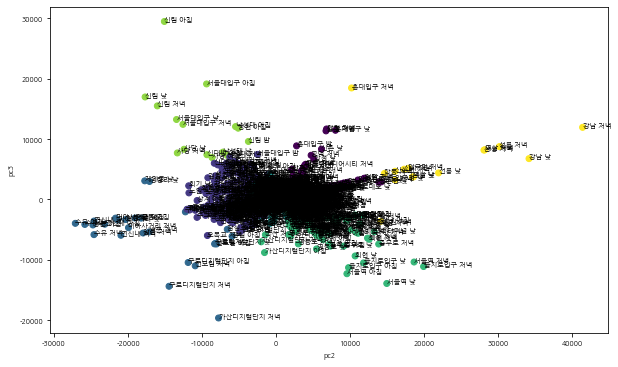

cluster : 3 / 동대문 아침
cluster : 4 / 동대문 낮
cluster : 3 / 동대문 저녁
cluster : 3 / 동대문 밤
cluster : 3 / 동묘앞 아침
cluster : 4 / 동묘앞 낮
cluster : 3 / 동묘앞 저녁
cluster : 3 / 동묘앞 밤
cluster : 4 / 서울역 아침
cluster : 4 / 서울역 낮
cluster : 4 / 서울역 저녁
cluster : 3 / 서울역 밤
cluster : 4 / 시청 아침
cluster : 4 / 시청 낮
cluster : 4 / 시청 저녁
cluster : 3 / 시청 밤
cluster : 1 / 신설동 아침
cluster : 1 / 신설동 낮
cluster : 1 / 신설동 저녁
cluster : 3 / 신설동 밤
cluster : 1 / 제기동 아침
cluster : 2 / 제기동 낮
cluster : 1 / 제기동 저녁
cluster : 3 / 제기동 밤
cluster : 4 / 종각 아침
cluster : 4 / 종각 낮
cluster : 4 / 종각 저녁
cluster : 3 / 종각 밤
cluster : 3 / 종로3가 아침
cluster : 4 / 종로3가 낮
cluster : 4 / 종로3가 저녁
cluster : 3 / 종로3가 밤
cluster : 3 / 종로5가 아침
cluster : 4 / 종로5가 낮
cluster : 4 / 종로5가 저녁
cluster : 3 / 종로5가 밤
cluster : 1 / 청량리 아침
cluster : 2 / 청량리 낮
cluster : 1 / 청량리 저녁
cluster : 3 / 청량리 밤
cluster : 6 / 강남 아침
cluster : 6 / 강남 낮
cluster : 6 / 강남 저녁
cluster : 4 / 강남 밤
cluster : 1 / 강변 아침
cluster : 1 / 강변 낮
cluster : 1 / 강변 저녁
cluster : 3 / 강변 밤
cluster : 1 / 건대입구 아침
cl

cluster : 3 / 군자 저녁
cluster : 3 / 군자 밤
cluster : 3 / 굽은다리 아침
cluster : 3 / 굽은다리 낮
cluster : 3 / 굽은다리 저녁
cluster : 3 / 굽은다리 밤
cluster : 3 / 길동 아침
cluster : 3 / 길동 낮
cluster : 3 / 길동 저녁
cluster : 3 / 길동 밤
cluster : 3 / 김포공항 아침
cluster : 3 / 김포공항 낮
cluster : 3 / 김포공항 저녁
cluster : 3 / 김포공항 밤
cluster : 1 / 까치산 아침
cluster : 1 / 까치산 낮
cluster : 1 / 까치산 저녁
cluster : 3 / 까치산 밤
cluster : 3 / 답십리 아침
cluster : 3 / 답십리 낮
cluster : 3 / 답십리 저녁
cluster : 3 / 답십리 밤
cluster : 3 / 동대문역사문화공원 아침
cluster : 3 / 동대문역사문화공원 낮
cluster : 3 / 동대문역사문화공원 저녁
cluster : 3 / 동대문역사문화공원 밤
cluster : 3 / 둔촌동 아침
cluster : 3 / 둔촌동 낮
cluster : 3 / 둔촌동 저녁
cluster : 3 / 둔촌동 밤
cluster : 3 / 마곡 아침
cluster : 3 / 마곡 낮
cluster : 3 / 마곡 저녁
cluster : 3 / 마곡 밤
cluster : 3 / 마장 아침
cluster : 3 / 마장 낮
cluster : 3 / 마장 저녁
cluster : 3 / 마장 밤
cluster : 3 / 마천 아침
cluster : 3 / 마천 낮
cluster : 3 / 마천 저녁
cluster : 3 / 마천 밤
cluster : 3 / 마포 아침
cluster : 0 / 마포 낮
cluster : 0 / 마포 저녁
cluster : 3 / 마포 밤
cluster : 3 / 명일 아침
cluster : 3 / 명일 낮
cluster 

cluster : 1 / 천호 아침
cluster : 1 / 천호 낮
cluster : 1 / 천호 저녁
cluster : 3 / 천호 밤
cluster : 1 / 가양 아침
cluster : 1 / 가양 낮
cluster : 1 / 가양 저녁
cluster : 3 / 가양 밤
cluster : 3 / 개화 아침
cluster : 3 / 개화 낮
cluster : 3 / 개화 저녁
cluster : 3 / 개화 밤
cluster : 3 / 고속터미널 아침
cluster : 0 / 고속터미널 낮
cluster : 0 / 고속터미널 저녁
cluster : 3 / 고속터미널 밤
cluster : 3 / 공항시장 아침
cluster : 3 / 공항시장 낮
cluster : 3 / 공항시장 저녁
cluster : 3 / 공항시장 밤
cluster : 3 / 구반포 아침
cluster : 3 / 구반포 낮
cluster : 3 / 구반포 저녁
cluster : 3 / 구반포 밤
cluster : 3 / 국회의사당 아침
cluster : 3 / 국회의사당 낮
cluster : 4 / 국회의사당 저녁
cluster : 3 / 국회의사당 밤
cluster : 3 / 김포공항 아침
cluster : 3 / 김포공항 낮
cluster : 3 / 김포공항 저녁
cluster : 3 / 김포공항 밤
cluster : 3 / 노들 아침
cluster : 3 / 노들 낮
cluster : 3 / 노들 저녁
cluster : 3 / 노들 밤
cluster : 1 / 노량진 아침
cluster : 1 / 노량진 낮
cluster : 1 / 노량진 저녁
cluster : 3 / 노량진 밤
cluster : 3 / 당산 아침
cluster : 3 / 당산 낮
cluster : 3 / 당산 저녁
cluster : 3 / 당산 밤
cluster : 3 / 동작 아침
cluster : 3 / 동작 낮
cluster : 3 / 동작 저녁
cluster : 3 / 동작 밤
cluster : 3 / 등촌

In [121]:
# KMeans에서 k 고정
k=7
silhouette_group = [];
result = [];
centers = [];
km = KMeans(n_clusters = k, random_state = 0); # Initial value => random_state attr.
km.fit(df_pc_kmeans); # Commit clustering
result = km.predict(df_pc_kmeans);

centers = km.cluster_centers_; # Print center
sil_score = silhouette_score(df_pc_kmeans, result.T, metric='euclidean');
silhouette_group.append(sil_score);
print('%d th silhouette score: %f' %(k, sil_score));

plt.scatter(df_pc_kmeans['pc1'], df_pc_kmeans['pc2'], c = result); # 점 plot 실행
plt.xlabel('pc1');
plt.ylabel('pc2');
plt.rc('font', size=7);
plt.rc('font', family='NanumGothic')        
for i in range(len(object_list)):
    plt.annotate('%s' % object_list[i], (df_pc_kmeans['pc1'][i], df_pc_kmeans['pc2'][i]))
plt.show();

plt.scatter(df_pc_kmeans['pc2'], df_pc_kmeans['pc3'], c = result); # 점 plot 실행
plt.xlabel('pc2');
plt.ylabel('pc3');
for i in range(len(object_list)):
    plt.annotate('%s' % object_list[i], (df_pc_kmeans['pc2'][i], df_pc_kmeans['pc3'][i]))
plt.show();

df_pc_kmeans['cluster']=result
df_pc_kmeans['name']=object_list
count = [0,0,0,0,0,0,0,0]
for i in range(len(object_list)):
    print("cluster : "+str(df_pc_kmeans['cluster'][i])+" / " + str(df_pc_kmeans['name'][i]))
    for j in range(8):
        if df_pc_kmeans['cluster'][i]==j:
            count[j] = count[j]+1;
print(count)


[ 0.51434135 -0.10574961  0.26256383 ...  0.31606879  0.33640101
  0.22634154]


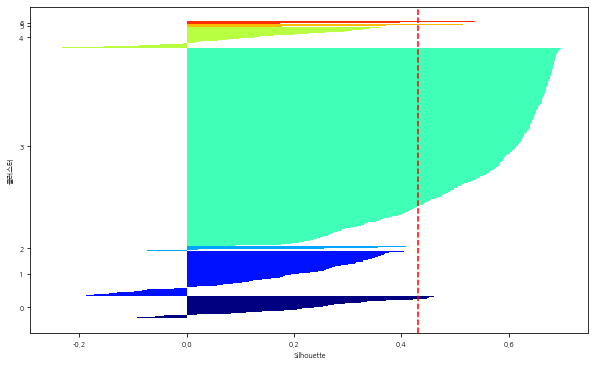

[0 1 2 3 4 5 6]


In [122]:
# silhouette 그래프 자세히
from sklearn.metrics import silhouette_samples
from matplotlib import cm

silhouette_vals = silhouette_samples(df_pc_kmeans.drop(['name', 'cluster'], axis=1), result);
cluster_labels = np.unique(result);
n_clusters = cluster_labels.shape[0];
y_ax_lower, y_ax_upper = 0, 0;
yticks = [];
print(silhouette_vals);
for i,c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[result==c];
    c_silhouette_vals.sort();
    y_ax_upper += len(c_silhouette_vals);
    color = cm.jet(i/n_clusters);
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color);
    yticks.append((y_ax_lower + y_ax_upper)/2);
    y_ax_lower += len(c_silhouette_vals);
    
silhouette_avg = np.mean(silhouette_vals);

plt.axvline(silhouette_avg, color='red', linestyle='--');
plt.rc('font', size=15);
plt.yticks(yticks, cluster_labels);
plt.ylabel('클러스터');
plt.xlabel('Silhouette');
plt.show();
print(cluster_labels);

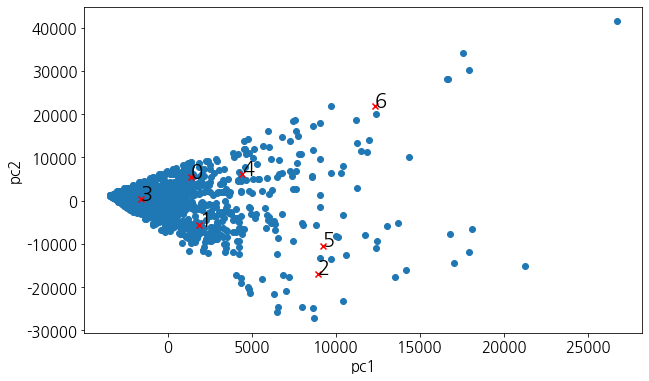

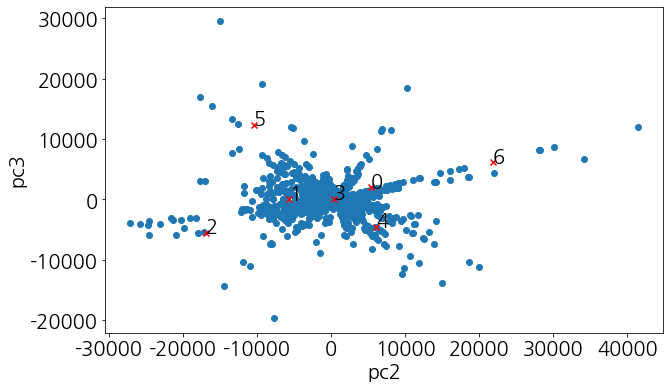

In [123]:
# 클러스터 중심 표시

plt.scatter(df_pc_kmeans['pc1'], df_pc_kmeans['pc2']); # 점 plot 실행
plt.xlabel('pc1');
plt.ylabel('pc2');
i = 0;
for i in range(len(centers)):
    plt.scatter(centers[i][0], centers[i][1], c='red', marker="x");
    plt.rc('font', size=20);
    plt.annotate('%d' % i, (centers[i][0], centers[i][1]));
plt.show();

plt.scatter(df_pc_kmeans['pc2'], df_pc_kmeans['pc3']); # 점 plot 실행
plt.xlabel('pc2');
plt.ylabel('pc3');
i = 0;
for i in range(len(centers)):
    plt.scatter(centers[i][1], centers[i][2], c='red', marker="x");
    plt.rc('font', size=20);
    plt.annotate('%d' % i, (centers[i][1], centers[i][2]));
plt.show();

In [137]:
for i in range(k):
    dist_of_K = km.cluster_centers_[:,i]
    rank_1 = np.where(dist_of_K[0:10] == sorted(dist_of_K[0:10], reverse=True)[0])[0][0]
    rank_2 = np.where(dist_of_K[0:10] == sorted(dist_of_K[0:10], reverse=True)[1])[0][0]
    rank_3 = np.where(dist_of_K[0:10] == sorted(dist_of_K[0:10], reverse=True)[2])[0][0]
    rank_4 = np.where(dist_of_K[0:10] == sorted(dist_of_K[0:10], reverse=True)[3])[0][0]
    print("cluster %d" % i, "(%3d objects)" % count[i], ":", 
          "%d," % rank_1, "%.3f" % dist_of_K[rank_1], "/", 
          "%d," % rank_2, "%.3f" % dist_of_K[rank_2], "/", 
          "%d," % rank_3, "%.3f" % dist_of_K[rank_3], "/", 
          "%d," % rank_4, "%.3f" % dist_of_K[rank_4])
    
for j in range(10):
    print(km.cluster_centers_[:,j]);

cluster 0 (108 objects) : 6, 12305.038 / 5, 9228.740 / 2, 8912.243 / 4, 4419.400
cluster 1 (226 objects) : 6, 21809.775 / 4, 6099.875 / 0, 5354.101 / 3, 387.076
cluster 2 ( 27 objects) : 5, 12368.944 / 6, 6189.797 / 0, 2022.144 / 3, 95.125
cluster 3 (989 objects) : 5, 5247.397 / 4, 2163.983 / 3, 112.184 / 1, -700.230
cluster 4 (100 objects) : 1, 607.434 / 4, 441.150 / 3, -80.691 / 0, -228.642
cluster 5 ( 15 objects) : 5, 1530.431 / 3, 96.457 / 1, 80.076 / 0, -375.298
cluster 6 ( 15 objects) : 5, 933.867 / 4, 81.222 / 3, 2.720 / 0, -36.702
[ 1364.11878204  1890.58451023  8912.24327056 -1597.74942261
  4419.40010579  9228.73997411 12305.0381793 ]
[  5354.10137926  -5691.15915553 -16884.50495482    387.07565502
   6099.87517085 -10407.42104013  21809.7753113 ]
[ 2022.14443862    45.21127169 -5471.61153975    95.12506749
 -4533.35644579 12368.94397422  6189.79720125]
[-1198.94591718  -700.22980807 -1614.05841082   112.18378622
  2163.98290875  5247.39688058 -4982.75572569]
[ -228.64166293 